<a href="https://colab.research.google.com/github/mnijhuis-dnb/Artificial_Intelligence_and_Machine_Learning_for_SupTech/blob/main/Tutorials/Tutorial%201%20How%20to%20read%20data%20and%20use%20sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial Intelligence and Machine Learning for SupTech  
Tutorial 1: How to read data and use sklearn
*	Getting started with Python and data manipulation. 
*	How is this different from Excel?
*	Read the data and get to know it. 
*	Introduction to sklearn: where to ﬁnd the buttons

<br/>

13 March 2023  

**Instructors**  
Prof. Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dr. Michiel Nijhuis (m.nijhuis@dnb.nl)  

----

###Notebooks
The tutorials in this course will be performed using notebooks. If you are unfamiliair with running code from a notebook you can follow this section to get aquinted with using notebooks.

### Preparation

At the beginning of each notebook, we have a short preparation section. This section will do two things. First of all it will loads all the necessary packages or download and install them. Secondly it will also download and extract the data we are going to use during the tutorial.

The first step is to going to load some of the general packages we are going to use throught the notebook. These are the following packages:
* **Pandas** &emsp;&ensp;&nbsp; A package for data manipulation and analysis
* **Numpy** &emsp;&emsp; A package for doing numerical calculations
* **Matplotlib** &ensp; A package for plotting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Hello world


Next we are going to retrieve some data from, we are going to do this by using an exclamation mark to start our commands. This will send the commands to the terminal instead of using the Python interperter

In [ ]:
!wget -O bdp2022-material.zip https://dieter.wang/files/bdp2022-material.zip

--2022-09-19 15:51:49--  https://dieter.wang/files/bdp2022-material.zip
Resolving dieter.wang (dieter.wang)... 85.13.135.217
Connecting to dieter.wang (dieter.wang)|85.13.135.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7092168 (6.8M) [application/zip]
Saving to: ‘bdp2022-material.zip’

bdp2022-material.zi 100%[===================>]   6.76M  4.18MB/s    in 1.6s    

2022-09-19 15:51:52 (4.18 MB/s) - ‘bdp2022-material.zip’ saved [7092168/7092168]

Archive:  bdp2022-material.zip
  inflating: data/application_record.csv  
  inflating: data/credit_record.csv  
  inflating: data/df_articles.csv    
  inflating: images/fig_linreg-logitreg.png  
  inflating: images/fig_precision.png  
  inflating: images/fig_recall.png   
  inflating: images/fig_reg-vs-clf.png  
  inflating: images/fig_vlookup.png  
  inflating: images/SQL-LEFT-JOIN.png  


As the data we retrieved is in an archive we are going to have to extract the data first

In [ ]:
!unzip -o bdp2022-material.zip

### Reading the data

1. After downloading the data, we need to first make sure that it in the right format. That is, numbers are recognized as numeric `1` rathan than a string `'1'`.

2. After the data is clear and in the right format, we split it into a training and a testing dataset. The training data will be used to train the model. This whole dataset is "visible" to the model. 

3. Afterwards, we will use a trained model and apply it to the testing data, which was "invisible" so far. This allows us to assess how well the model performs.

# About the dataset

This dataset consists of two files
* `df_records`, stored as `credit_record.csv`  
contains the monthly credit card status (paid off, overdue, written off, no loan). Each entry has a unique client number `ID`
* `df_applications`, stored as `application_record.csv`  
contains meta data about each client (gender, owns property, education, marital stats,...). Each client is also identfied with the unique client number `ID`

Let's have a look at both. In each case, we want to know how many records there are in total and how the first couple of rows look like.

# Make the labels: `df_records`
The goal of this section is to define what the goal of the predictions are. In this case we want to predict whether or not a client defaults on their credit card.

At this point we only focus on `df_records` and will get back to `df_applications` later. In the remainder of this notebook we will use `sr_defaults` as the outcome variable. In machine learning, the default status is often refered to as the label. In statistics or econometrics, this would be the dependent, endogenous or left-hand side variable.

The remaining columns of `df_applications` are the features. Alternatively, we call them predictors, exogenous variables or right-hand side variables.

In [ ]:
path = 'data/credit_record.csv'
df_record = pd.read_csv(path)

In [ ]:
df_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
df_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [ ]:
path = 'data/application_record.csv'
df_applications = pd.read_csv(path)

In [ ]:
# show the first 10 rows
df_record.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [ ]:
# show the first 10 rows
df_applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


## What are DataFrames?

These are what we call DataFrames. They are a flexible and powerful data storage unit and one of the main reasons for Python's popularity. Think of it as containing an excel spreadsheet. It contains rows, columns and cells. For those familiar with relational databases, you can also think of these as tables. What is powerful about DataFrames is that it automates what you usually do in Excel.

Each client has a credit card that can used each month. 

The columns
* `MONTHS_BALANCE` is a time indicator. When it is `0` it refers to the current month. When it is `-1` it refers to last month, and so on. 
* `STATUS` tells us what the status of the credit card debt is. The possible values are

```
X: no loan
C: paid off
0: overdue <1 month
1: overdue 1 months
2: overdue 2 months
3: overdue 3 months
4: overdue 4 months
5: overdue 5 months or more (written-off)
```


## Navigating DataFrames


Let us start by selecting the credit card status of client `5001711`. For this purpose we can tell the dataframe to use the column `ID` as the index. An index is like the "name" of the row, such that we can more easily refer to it. 

In [ ]:
df_record = df_record.set_index('ID')
df_record.head(10)

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C
5001712,-1,C
5001712,-2,C
5001712,-3,C
5001712,-4,C


To select a row (or rows) by the client number `ID`, we use the `.loc` operator. 

In [ ]:
df_record.loc[5001711]

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0


We can also select entire columns. For this we need to tell python to select all rows (`:`) of a specific column

In [ ]:
df_record.loc[:,'STATUS']

ID
5001711    X
5001711    0
5001711    0
5001711    0
5001712    C
          ..
5150487    C
5150487    C
5150487    C
5150487    C
5150487    C
Name: STATUS, Length: 1048575, dtype: object

Finally, we can also select the statuses of a specific client

In [ ]:
df_record.loc[5001711,'STATUS']

ID
5001711    X
5001711    0
5001711    0
5001711    0
Name: STATUS, dtype: object

##  Renaming columns and values

The columns `MONTHS_BALANCE` and `STATUS` are given. Let create new columns that are more easily readable and easier to plot. 

For `MONTHS_BALANCE`, we only want to give it a different name.

In [ ]:
df_record = df_record.rename(columns={'MONTHS_BALANCE': 'month'})
df_record.head()

,month,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


For `STATUS`, we want to not only rename it, but also convert it to numeric values. Recall that the possible values are

```
X: no loan
C: paid off
0: overdue <1 month
1: overdue 1 months
2: overdue 2 months
3: overdue 3 months
4: overdue 4 months
5: overdue 5 months or more (written-off)
```

This means, it has strings (`X` or `C`) as well as integers (`0,1,...5`). For our purposes, we do not need to differentiate whether the client has status `X: no loan` or `'C: paid off` or is `0: overdue <1 month`. Let us therefore convert `X` and `C` to `0`.

In [ ]:
df_record.loc[:,'status'] = df_record.loc[:,'STATUS']
df_record.loc[:,'status'] = df_record.loc[:,'status'].replace('X', '0')
df_record.loc[:,'status'] = df_record.loc[:,'status'].replace('C', '0')

Now we can tell the column to be integers instead of strings.

In [ ]:
df_record.loc[:,'status'].values

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [ ]:
df_record.loc[:,'status'] = df_record.loc[:,'status'].astype(int)
df_record.loc[:,'status'].values

array([0, 0, 0, ..., 0, 0, 0])

This is important because we want to plot the results in the next step. If the values are stored as strings `'0'` rather than integers `0`, the plotter wouldn't know how to plot `'0'` just like it wouldn't know how to plot the letter `C`.

## Visually inspect the results

In [ ]:
import matplotlib.pyplot as plt

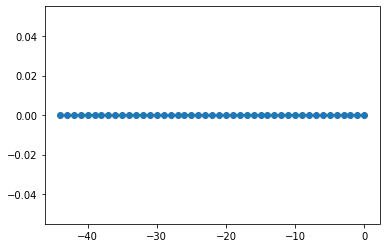

In [ ]:
client_id = 5112594

x = df_record.loc[client_id, 'month']
y = df_record.loc[client_id, 'status']

plt.plot(x, y, marker='o')

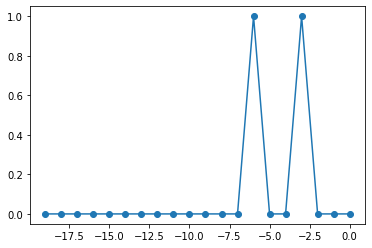

In [ ]:
client_id = 5112599

x = df_record.loc[client_id, 'month']
y = df_record.loc[client_id, 'status']

plt.plot(x, y, marker='o')

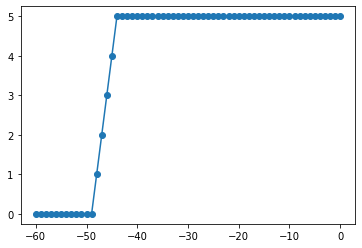

In [ ]:
client_id = 5085886

x = df_record.loc[client_id, 'month']
y = df_record.loc[client_id, 'status']

plt.plot(x, y, marker='o')

## Create variable `DEFAULTED`

For our later exercise of classifying and predicting clients based on their application characteristics in `df_applicaitons`, we want to summarize the time series of each client to one variable, which captures: Did the client default at some point?

Since the column `status` contains all necessary information, all we need to do is to ask: Was the `status` at any point higher or equal than `3`? That is, was the client at any point past due more than 90 days? 

To make life easier, let us first select the history of one client that we know to have defaulted and one that did not. 

In [ ]:
bad_client_id = 5085886
good_client_id = 5112594

### Bad client

Since we want to know a client defaulted at **any** point, we do not need the months anymore. We only need to select one column. In such a case, there is no need for a full dataframe. Instead, a Series sufficies.

Series are to DataFrames what vectors are to matrices. They are simpler and only 1-dimensional. You can decompose a DataFrame into Series and build a DataFrame out of Series.

In [ ]:
type(df_record)

pandas.core.frame.DataFrame

In [ ]:
sr_client = df_record.loc[bad_client_id, 'status']
sr_client

ID
5085886    5
5085886    5
5085886    5
5085886    5
5085886    5
          ..
5085886    0
5085886    0
5085886    0
5085886    0
5085886    0
Name: status, Length: 61, dtype: int64

In [ ]:
type(sr_client)

pandas.core.series.Series

In [ ]:
sr_defaulted = sr_client >= 2
sr_defaulted

ID
5085886     True
5085886     True
5085886     True
5085886     True
5085886     True
           ...  
5085886    False
5085886    False
5085886    False
5085886    False
5085886    False
Name: status, Length: 61, dtype: bool

Note that we now know if the client defaulted in each month, but this is not yet aggregated. We only want to know if any **any** point, the client defaulted. One way to ask this question is to count the number of `True` values and ask whether this total count is larger than `0`

In [ ]:
sr_defaulted.sum()

48

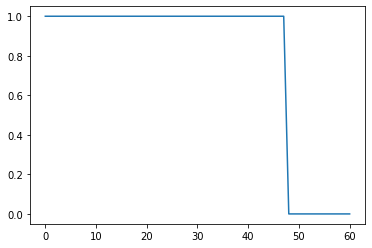

In [ ]:
plt.plot(sr_defaulted.values)

In [ ]:
sr_defaulted.sum() > 0

True

### Good client
For a good client, the result should be `False`

In [ ]:
sr_client = df_record.loc[good_client_id, 'status']
sr_defaulted = sr_client >= 2
sr_defaulted.sum() > 0

False

### Automation: define a function
Given that there are 45,985 unique clients, we do not want to do this manually. As we will see, we can do this in just one step later one. But first, let us automate the last tasks we did: Did a client default at any point?

In [ ]:
def was_there_a_default(sr_client):
    sr_defaulted = sr_client >= 2
    return sr_defaulted.sum() > 0

In [ ]:
sr_good_client = df_record.loc[good_client_id, 'status']
sr_bad_client = df_record.loc[bad_client_id, 'status']

In [ ]:
was_there_a_default(sr_good_client)

False

In [ ]:
was_there_a_default(sr_bad_client)

True

### Automation: Apply the function across all clients

In [ ]:
sr_all_statuses = df_record.loc[:,'status']
sr_all_statuses.head(10)

ID
5001711    0
5001711    0
5001711    0
5001711    0
5001712    0
5001712    0
5001712    0
5001712    0
5001712    0
5001712    0
Name: status, dtype: int64

In [ ]:
sr_defaults = sr_all_statuses.groupby('ID').apply(was_there_a_default)

In [ ]:
sr_defaults.value_counts()

False    45318
True       667
Name: status, dtype: int64

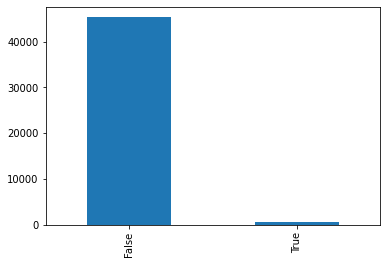

In [ ]:
sr_defaults.value_counts().plot.bar()

## Sidebar: What is `groupby`?
One of the most useful features of Series (and DataFrames) is the `groupby` method. It groups all rows with the same index together and applies a function to each of the groups as if they were separate Series. Afterwards, it glues them together again.

For instance, if we have this simple series
```
>>> sr 
ID
A    0
A    1
A    1
B    1
B    0
```
we can then run the command `sr.groupby('ID').apply(sum)`. This will first split them into two "subseries"
```
A = [0, 1, 1]
B = [1, 0]
```
to which it then applies the function `sum` to
```
A = f([0, 1, 1])
B = f([1, 0])
```
The result would then be
```
>>> sr.groupby('ID').apply(sum)
ID
A    2
B    1
```

----

# Make the features: `df_applications`

In [ ]:
df_applications.shape

(438557, 18)

In [ ]:
df_applications = df_applications.drop_duplicates(subset='ID')

In [ ]:
df_applications = df_applications.set_index('ID')

In [ ]:
df_applications = df_applications.dropna()

## What type of data is in each column?

In [ ]:
df_dtypes = df_applications.dtypes.to_frame('dtypes')
df_dtypes

,dtypes
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object
DAYS_BIRTH,int64


The `.dtypes` attribute tells us what the datatype of this each column is. `int64` and `float64` are numeric, e.g. `1` and `1.0` respectively. For `object`, however, it isn't clear. Sometimes, these can be `'1'` strings that are actually numeric values. Or, these are actual strings, such as `'Cooking staff'`. Finally, boolean values (`True` or `False`) can also have the data type `object`.

Let us create a convenient DataFrame that contains the first two rows as columns, along with an additional column on the data types.

In [ ]:
df_dtypes = df_dtypes.join(df_applications.head(2).T)
df_dtypes

,dtypes,5008806,5008808
CODE_GENDER,object,M,F
FLAG_OWN_CAR,object,Y,N
FLAG_OWN_REALTY,object,Y,Y
CNT_CHILDREN,int64,0,0
AMT_INCOME_TOTAL,float64,112500.0,270000.0
NAME_INCOME_TYPE,object,Working,Commercial associate
NAME_EDUCATION_TYPE,object,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,object,Married,Single / not married
NAME_HOUSING_TYPE,object,House / apartment,House / apartment
DAYS_BIRTH,int64,-21474,-19110


In [ ]:
rows_not_object = df_dtypes['dtypes'] != 'object'
df_dtypes_notobj = df_dtypes.loc[rows_not_object]
df_dtypes_notobj

,dtypes,5008806,5008808
CNT_CHILDREN,int64,0,0
AMT_INCOME_TOTAL,float64,112500.0,270000.0
DAYS_BIRTH,int64,-21474,-19110
DAYS_EMPLOYED,int64,-1134,-3051
FLAG_MOBIL,int64,1,1
FLAG_WORK_PHONE,int64,0,0
FLAG_PHONE,int64,0,1
FLAG_EMAIL,int64,0,1
CNT_FAM_MEMBERS,float64,2.0,1.0


In [ ]:
rows_object = df_dtypes['dtypes'] == 'object'
df_dtypes_obj = df_dtypes.loc[rows_object]
df_dtypes_obj

,dtypes,5008806,5008808
CODE_GENDER,object,M,F
FLAG_OWN_CAR,object,Y,N
FLAG_OWN_REALTY,object,Y,Y
NAME_INCOME_TYPE,object,Working,Commercial associate
NAME_EDUCATION_TYPE,object,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,object,Married,Single / not married
NAME_HOUSING_TYPE,object,House / apartment,House / apartment
OCCUPATION_TYPE,object,Security staff,Sales staff


## Convert binary to numeric?

This requires careful thinking. If the values are actually numeric but stored as strings, e.g. `'1'`, it's easy to just convert them to numeric. Boolean values `True` and `False` also translate into integers `1` and `0`.

It turns out, all variables starting with `FLAG_` are actually boolean values. Moreover, `CODE_GENDER` is binary. Finally, the `DEFAULTED` column we created is binary as well.

### Manually convert: `CODE_GENDER`

To convert this into a numeric column, we generate a new series `sr_female` manually as follows

In [ ]:
sr_female = df_applications.loc[:,'CODE_GENDER']

In [ ]:
sr_female = sr_female == 'F'
# Note: The first equal sign (=) is to define a variable
# The two equal signs (==) is a comparison operator and returns the result

In [ ]:
sr_female = sr_female.astype(int)

In [ ]:
df_applications.shape

(304317, 17)

In [ ]:
# Defining a 'name' for Series is necessary before a `.join()`, 
# as the name becomes the column label in the joined DataFrame, which we will do next

sr_female.name = 'FEMALE'
df_applications = df_applications.join(sr_female)

In [ ]:
df_applications

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FEMALE
ID,,,,,,,,,,,,,,,,,,
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0,0
6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0,0
6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,1


Since we do not need the original column `CODE_GENDER` anymore, let us drop it.

In [ ]:
df_applications = df_applications.drop('CODE_GENDER', axis=1)

## Sidebar: What is join?

We now add the `sr_defaults` data as a column into `df_applications`. For this purpose we use `df_applications.join(sr_defaults)`. In words, we are joining `sr_defaults` into `df_applications` where we use `ID` as the key to join upon.

For those familiar with SQL, this is equivalent to a `LEFT JOIN`. 

<img src="http://dieter.wang/files/images/SQL-LEFT-JOIN.png">

In excel, this corresponds to `=VLOOKUP()` where the lookup variable is `ID`.

<img src="http://dieter.wang/files/images/fig_vlookup.png">


### Automatically convert binary data

In [ ]:
def make_binary_columns(df, column, value, name):
    sr_binary = df.loc[:,column]
    sr_binary = (sr_binary == value).astype(int)
    sr_binary.name = name
    return sr_binary

In [ ]:
column = 'FLAG_OWN_REALTY'
sr = make_binary_columns(df_applications, column, 'Y', 'HAS_REALTY')
df_applications = df_applications.join(sr).drop(column, axis=1)

In [ ]:
column = 'FLAG_OWN_CAR'
sr = make_binary_columns(df_applications, column, 'Y', 'HAS_CAR')
df_applications = df_applications.join(sr).drop(column, axis=1)

In [ ]:
df_applications.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FEMALE,HAS_REALTY,HAS_CAR
ID,,,,,,,,,,,,,,,,,
5008806,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1,1
5008808,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0
5008809,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0
5008810,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0
5008811,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0


## Convert multinomial to numeric?

This requires even more careful thinking. How should we translate `NAME_FAMILY_STATUS` into numeric values?

In [ ]:
df_applications['NAME_FAMILY_STATUS'].value_counts()

Married                 212697
Single / not married     39638
Civil marriage           26800
Separated                18470
Widow                     6712
Name: NAME_FAMILY_STATUS, dtype: int64

Should we use the following?

```
Married                => 0
Single / not married   => 1
Civil marriage         => 2
Separated              => 3
Widow                  => 4
```

This is problematic. Not only do we impose an "order" to the statuses. More problematically, we say that `Separated` is the average of `Civil marriage` and `Widow`.

### Manually: One-hot encoding
A better way is to give each possible state a dummy column

In [ ]:
df_dummies = pd.get_dummies(df_applications['NAME_FAMILY_STATUS'])
df_dummies.head(10)

,Civil marriage,Married,Separated,Single / not married,Widow
ID,,,,,
5008806,0,1,0,0,0
5008808,0,0,0,1,0
5008809,0,0,0,1,0
5008810,0,0,0,1,0
5008811,0,0,0,1,0
5008815,0,1,0,0,0
5112956,0,1,0,0,0
6153651,0,1,0,0,0
5008819,0,1,0,0,0


Once again, we need to define a base category for removal to avoid multicollinarity

In [ ]:
base_category = 'Single / not married'

In [ ]:
df_dummies = df_dummies.drop(base_category, axis=1)
df_dummies

,Civil marriage,Married,Separated,Widow
ID,,,,
5008806,0,1,0,0
5008808,0,0,0,0
5008809,0,0,0,0
5008810,0,0,0,0
5008811,0,0,0,0
...,...,...,...,...
6837707,1,0,0,0
6839936,0,1,0,0
6840222,0,0,0,0


For the sake of consistency, let us convert all column names to upper case

In [ ]:
df_dummies.columns = df_dummies.columns.map(str.upper)
df_dummies.columns

Index(['CIVIL MARRIAGE', 'MARRIED', 'SEPARATED', 'WIDOW'], dtype='object')

Now we can join it into the full dataset and drop the original column

In [ ]:
df_applications = df_applications.join(df_dummies)
df_applications = df_applications.drop('NAME_FAMILY_STATUS', axis=1)
df_applications.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FEMALE,HAS_REALTY,HAS_CAR,CIVIL MARRIAGE,MARRIED,SEPARATED,WIDOW
ID,,,,,,,,,,,,,,,,,,,,
5008806,0,112500.0,Working,Secondary / secondary special,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,1,1,0,1,0,0
5008808,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0,0,0,0,0
5008809,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0,0,0,0,0
5008810,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0,0,0,0,0
5008811,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,1,0,0,0,0,0


### Automatically convert multinomial data

In [ ]:
df_dtypes_obj

,dtypes,5008806,5008808
CODE_GENDER,object,M,F
FLAG_OWN_CAR,object,Y,N
FLAG_OWN_REALTY,object,Y,Y
NAME_INCOME_TYPE,object,Working,Commercial associate
NAME_EDUCATION_TYPE,object,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,object,Married,Single / not married
NAME_HOUSING_TYPE,object,House / apartment,House / apartment
OCCUPATION_TYPE,object,Security staff,Sales staff


In [ ]:
def make_multinomial_columns(df, column, base_category):
    df_dummies = pd.get_dummies(df_applications[column])
    df_dummies = df_dummies.drop(base_category, axis=1)
    df_dummies.columns = df_dummies.columns.map(str.upper)
    
    return df_dummies

#### Income type

In [ ]:
df_applications.shape

(304317, 20)

In [ ]:
column = 'NAME_INCOME_TYPE'
df_applications.loc[:,column].value_counts()

Working                 190192
Commercial associate     84002
State servant            29975
Pensioner                  136
Student                     12
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
df_dummies = make_multinomial_columns(df_applications, column, 'Working')
df_applications = df_applications.join(df_dummies).drop(column, axis=1)

#### Education type

In [ ]:
column = 'NAME_EDUCATION_TYPE'
df_applications.loc[:,column].value_counts()

Secondary / secondary special    204766
Higher education                  85655
Incomplete higher                 11632
Lower secondary                    2039
Academic degree                     225
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
df_dummies = make_multinomial_columns(df_applications, column, 'Academic degree')
df_applications = df_applications.join(df_dummies).drop(column, axis=1)

#### Housing type

In [ ]:
column = 'NAME_HOUSING_TYPE'
df_applications.loc[:,column].value_counts()

House / apartment      269985
With parents            15639
Municipal apartment      9662
Rented apartment         4818
Office apartment         3005
Co-op apartment          1208
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
df_dummies = make_multinomial_columns(df_applications, column, 'House / apartment')
df_applications = df_applications.join(df_dummies).drop(column, axis=1)

#### Occupation type

In [ ]:
column = 'OCCUPATION_TYPE'
df_applications.loc[:,column].value_counts()

Laborers                 78231
Core staff               43000
Sales staff              41094
Managers                 35481
Drivers                  26090
High skill tech staff    17285
Accountants              15983
Medicine staff           13518
Cooking staff             8076
Security staff            7993
Cleaning staff            5843
Private service staff     3455
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df_dummies = make_multinomial_columns(df_applications, column, 'Laborers')
df_applications = df_applications.join(df_dummies).drop(column, axis=1)

## Inspect the final `df_applications`

In [ ]:
df_applications.dtypes

CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
FLAG_MOBIL                         int64
FLAG_WORK_PHONE                    int64
FLAG_PHONE                         int64
FLAG_EMAIL                         int64
CNT_FAM_MEMBERS                  float64
FEMALE                             int64
HAS_REALTY                         int64
HAS_CAR                            int64
CIVIL MARRIAGE                     uint8
MARRIED                            uint8
SEPARATED                          uint8
WIDOW                              uint8
COMMERCIAL ASSOCIATE               uint8
PENSIONER                          uint8
STATE SERVANT                      uint8
STUDENT                            uint8
HIGHER EDUCATION                   uint8
INCOMPLETE HIGHER                  uint8
LOWER SECONDARY                    uint8
SECONDARY / SECONDARY SPECIAL      uint8
CO-OP APARTMENT 

## Getting all together into one

Now it is time to merge both `sr_defaults` and `df_applications`. Using the latter as the main DataFrame, we join `sr_defaults` into it.

In [ ]:
sr_defaults = sr_defaults.astype(int)

In [ ]:
sr_defaults.name = 'DEFAULTED'

In [ ]:
df_data = df_applications.join(sr_defaults)
df_data = df_data.dropna()

----

# Analysis

Now that we have gotten to know the data, let us proceed with the analysis. At the end of the day, we want to best predict the outcome of `sr_defaults`. That is, given a set of features or client characteristics, would we predict a default or not? 

Note that at this point, the goal is not to make the best possible predictions. Rather, we would like to understand the pros and cons of each model.

The dataset is strongly unbalanced, i.e. most cases are not defaults and few are defaults. To make the tutorial more insightful, let us select a random subset of the not-defaulted

In [ ]:
df_data['DEFAULTED'].value_counts()

0.0    24712
1.0      422
Name: DEFAULTED, dtype: int64

In [ ]:
df_data = pd.concat([
  df_data.loc[df_data['DEFAULTED'] == 0].sample(2513),
  df_data.loc[df_data['DEFAULTED'] == 1],
])

In [ ]:
df_data['DEFAULTED'].value_counts()

0.0    2513
1.0     422
Name: DEFAULTED, dtype: int64

Let us look the most correlated regressors with respect to `DEFAULTED`

In [ ]:
df_corr = df_data.corr()
df_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,...,LOW-SKILL LABORERS,MANAGERS,MEDICINE STAFF,PRIVATE SERVICE STAFF,REALTY AGENTS,SALES STAFF,SECRETARIES,SECURITY STAFF,WAITERS/BARMEN STAFF,DEFAULTED
CNT_CHILDREN,1.000000,-0.028367,0.244459,0.028190,NaN,0.019392,-0.000722,-0.011569,0.894908,0.041338,...,-0.018996,0.004364,0.007797,-0.032138,-0.010953,0.011318,-0.000360,-0.027969,-0.003558,0.002030
AMT_INCOME_TOTAL,-0.028367,1.000000,-0.058118,-0.031333,NaN,-0.071839,0.011040,0.083245,-0.042827,-0.191181,...,-0.063151,0.265880,-0.071976,0.002903,0.051046,-0.098261,-0.043555,0.007905,-0.034724,0.012906
DAYS_BIRTH,0.244459,-0.058118,1.000000,0.310082,NaN,0.043393,-0.030930,0.043278,0.190099,-0.088344,...,-0.018651,-0.047908,-0.040858,-0.011974,-0.003604,0.054137,-0.003033,-0.109417,0.037646,0.015281
DAYS_EMPLOYED,0.028190,-0.031333,0.310082,1.000000,NaN,-0.019358,-0.048561,0.065863,-0.000114,-0.131024,...,0.018040,-0.065126,-0.159693,-0.002983,0.001945,0.104739,-0.011456,0.066824,0.025715,0.091458
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.019392,-0.071839,0.043393,-0.019358,NaN,1.000000,0.352535,-0.100592,0.036082,-0.023897,...,0.006782,0.029601,-0.000679,-0.006394,-0.000400,-0.017740,0.008274,-0.010161,0.027750,0.016691
FLAG_PHONE,-0.000722,0.011040,-0.030930,-0.048561,NaN,0.352535,1.000000,0.016148,0.000704,0.051778,...,-0.004247,0.015247,0.019002,0.010742,0.010010,-0.013832,0.014184,-0.029662,-0.008653,0.012386
FLAG_EMAIL,-0.011569,0.083245,0.043278,0.065863,NaN,-0.100592,0.016148,1.000000,-0.002861,-0.008135,...,0.005021,-0.008646,-0.013223,0.025010,0.016871,-0.034443,-0.002491,0.053606,-0.005029,0.003295
CNT_FAM_MEMBERS,0.894908,-0.042827,0.190099,-0.000114,NaN,0.036082,0.000704,-0.002861,1.000000,0.016556,...,-0.000264,0.027289,0.018303,-0.057849,0.005912,0.018676,-0.004074,-0.011247,-0.002882,-0.007894
FEMALE,0.041338,-0.191181,-0.088344,-0.131024,NaN,-0.023897,0.051778,-0.008135,0.016556,1.000000,...,-0.074571,-0.071067,0.148899,0.069154,0.037108,0.199247,0.068810,-0.126654,0.031728,-0.058627


In [ ]:
df_corr.loc['DEFAULTED'].abs().sort_values(ascending=False).head(10)

DEFAULTED             1.000000
PENSIONER             0.162769
DAYS_EMPLOYED         0.091458
HAS_REALTY            0.061044
FEMALE                0.058627
LOW-SKILL LABORERS    0.044165
STATE SERVANT         0.039282
MEDICINE STAFF        0.037794
CORE STAFF            0.037310
SEPARATED             0.037278
Name: DEFAULTED, dtype: float64

In [ ]:
df_corr.loc['DEFAULTED'].abs().sort_values(ascending=False).head(10).index

Index(['DEFAULTED', 'PENSIONER', 'DAYS_EMPLOYED', 'HAS_REALTY', 'FEMALE',
       'LOW-SKILL LABORERS', 'STATE SERVANT', 'MEDICINE STAFF', 'CORE STAFF',
       'SEPARATED'],
      dtype='object')

## Employment duration

For the sake of simplicity, let us only look at the predictive power of `DAYS_EMPLOYED` on the outcome variable `DEFAULTED`

If `DAYS_EMPLOYED` is negative, it counts the number of days the client has already been employed.
If it is positive, it counts how many days the client has been unemployed.

Since we would assume that the longer one is employed, the lower one is to default, let us switch the signs.

In [ ]:
sr_employ = -df_data.loc[:,'DAYS_EMPLOYED']

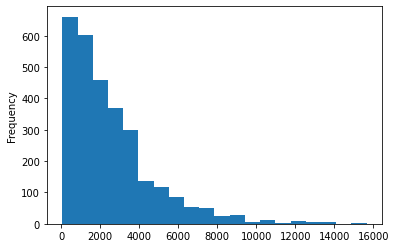

In [ ]:
sr_employ.plot.hist(bins=20)

### Log10 transformation

A base-10 logarithmic transformation removes the outliers. This is useful for a regression.

In [ ]:
sr_employ_log10 = np.log10(sr_employ)

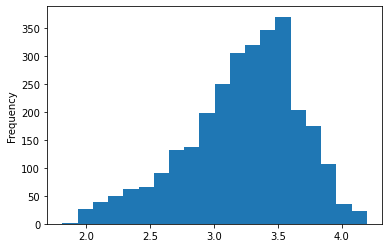

In [ ]:
sr_employ_log10.plot.hist(bins=20)

In [ ]:
df_data.loc[:,'DAYS_EMPLOYED_LOG10'] = sr_employ_log10

### Binning
Instead of knowing how many days exactly the employment duration was, what matters for a classifier is the rough range. That is, a categorization into whether a client just started, has some experience, is very experienced, etc. We achieve this through binning.

In [ ]:
sr_bins = pd.cut(sr_employ, 10)
sr_bins.value_counts()

(49.404, 1624.6]      1263
(1624.6, 3184.2]       829
(3184.2, 4743.8]       437
(4743.8, 6303.4]       202
(6303.4, 7863.0]       105
(7863.0, 9422.6]        55
(9422.6, 10982.2]       20
(12541.8, 14101.4]      12
(10982.2, 12541.8]      11
(14101.4, 15661.0]       1
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
df_data.loc[:,'DAYS_EMPLOYED_BINS'] = sr_bins.cat.codes

## Total income

A similar argument can be made for total income. We use log-10 transformation and binning.

In [ ]:
sr_income = df_data.loc[:,'AMT_INCOME_TOTAL']

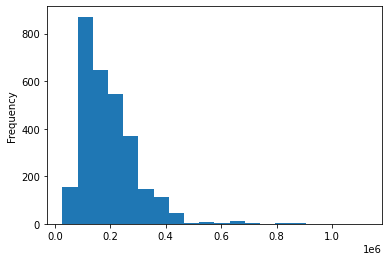

In [ ]:
sr_income.plot.hist(bins=20)

### Log10 transformation

In [ ]:
sr_income_log10 = np.log10(df_data.loc[:,'AMT_INCOME_TOTAL'])

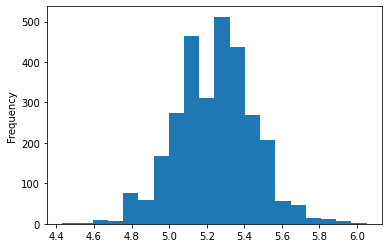

In [ ]:
sr_income_log10.plot.hist(bins=20)

In [ ]:
df_data.loc[:,'AMT_INCOME_TOTAL_LOG10'] = sr_income_log10

### Binning

In [ ]:
sr_bins = pd.cut(sr_income, 10)

In [ ]:
df_data.loc[:,'AMT_INCOME_TOTAL_BINS'] = sr_bins.cat.codes

# Linear Regression

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
sr_endog = df_data.loc[:,'DEFAULTED'].astype(float)

df_exogs = df_data.loc[:,[
  'DAYS_EMPLOYED_LOG10',
  'AMT_INCOME_TOTAL_LOG10', 
  'FEMALE',
  'PENSIONER', 
  'CORE STAFF', 
  'LOWER SECONDARY', 
  'CIVIL MARRIAGE', 
  'MUNICIPAL APARTMENT', 
]]
df_exogs = sm.add_constant(df_exogs)
df_exogs.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,DAYS_EMPLOYED_LOG10,AMT_INCOME_TOTAL_LOG10,FEMALE,PENSIONER,CORE STAFF,LOWER SECONDARY,CIVIL MARRIAGE,MUNICIPAL APARTMENT
ID,,,,,,,,,
5088290,1.0,2.454845,5.352183,0,0,0,0,0,0
5135669,1.0,3.894316,5.334454,1,0,0,0,0,0
5143600,1.0,3.522835,4.954243,1,0,0,0,1,0
5038615,1.0,3.514813,5.051153,1,0,1,0,0,0
5050542,1.0,3.489677,5.352183,0,0,0,0,1,0


## Econometric view: with `statsmodels`

In [ ]:
linreg_sm = sm.OLS(
    endog=sr_endog,
    exog=df_exogs,
).fit()

print(linreg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              DEFAULTED   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     16.11
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.69e-23
Time:                        15:52:08   Log-Likelihood:                -1027.4
No. Observations:                2935   AIC:                             2073.
Df Residuals:                    2926   BIC:                             2127.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Machine learning: with `scikit-learn`

In [ ]:
X = df_exogs.values
y = sr_endog.values

In [ ]:
linreg_ml = LinearRegression(fit_intercept=False)
linreg_ml.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
linreg_ml.coef_

array([ 0.3821456 , -0.07890382,  0.00530433, -0.03677142,  0.84535328,
        0.04088663,  0.1170635 , -0.01044891,  0.0264349 ])

In [ ]:
linreg_ml.score(X, y)

0.042188629479862794

# Classification

Until now we have used linear regressions to best predict the outcome. The results are very poor. With $R^2$ of 3-4%, there is little hope for this to continue well, especially if we are concerned about "external validity". 

This is not surprising since we do not have a regression problem. Instead, the outcome is binary. We are not that much interested in a trend or "regressing toward the mean". A better approach is classification.

<img src="http://dieter.wang/files/images/fig_reg-vs-clf.png" />

In [ ]:
sr_endog = df_data.loc[:,'DEFAULTED'].astype(float)

df_exogs = df_data.loc[:,[
  'DAYS_EMPLOYED_LOG10',
  'AMT_INCOME_TOTAL_LOG10', 
  'DAYS_EMPLOYED_BINS',
  'AMT_INCOME_TOTAL_BINS', 
  'FEMALE',
  'PENSIONER', 
  'CORE STAFF', 
  'LOWER SECONDARY', 
  'CIVIL MARRIAGE', 
  'MUNICIPAL APARTMENT', 
]]
df_exogs = sm.add_constant(df_exogs)
df_exogs.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,DAYS_EMPLOYED_LOG10,AMT_INCOME_TOTAL_LOG10,DAYS_EMPLOYED_BINS,AMT_INCOME_TOTAL_BINS,FEMALE,PENSIONER,CORE STAFF,LOWER SECONDARY,CIVIL MARRIAGE,MUNICIPAL APARTMENT
ID,,,,,,,,,,,
5088290,1.0,2.454845,5.352183,0,1,0,0,0,0,0,0
5135669,1.0,3.894316,5.334454,4,1,1,0,0,0,0,0
5143600,1.0,3.522835,4.954243,2,0,1,0,0,0,1,0
5038615,1.0,3.514813,5.051153,2,0,1,0,1,0,0,0
5050542,1.0,3.489677,5.352183,1,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_exogs)
y = sr_endog.values

## Logistic regression

<img src="http://dieter.wang/files/images/fig_linreg-logitreg.png" />

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
mdl_logit = LogisticRegression(
    fit_intercept=True
).fit(
    X=X,
    y=y,
)

In [ ]:
y_pred_logit = mdl_logit.predict(X)
y_pred_logit.sum()

13.0

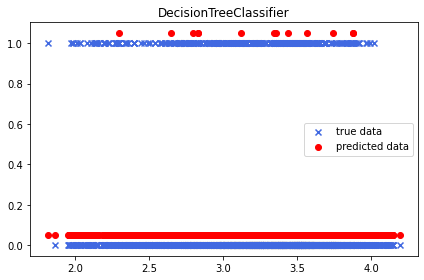

In [ ]:
x = df_exogs['DAYS_EMPLOYED_LOG10']
plt.scatter(x, y, marker='x', color='royalblue', label='true data')
plt.scatter(x, y_pred_logit+.05, marker='o', color='r', label='predicted data')
plt.title('DecisionTreeClassifier')
plt.legend()
plt.tight_layout()

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
mdl_percep = Perceptron().fit(
    X=X,
    y=y,
)

In [ ]:
y_pred_percep = mdl_percep.predict(X)
y_pred_percep.sum()

1009.0

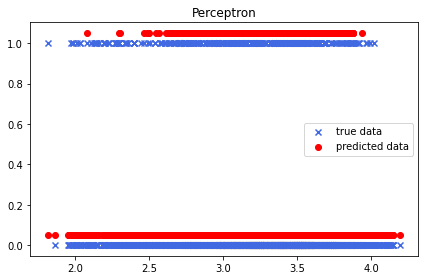

In [ ]:
x = df_exogs['DAYS_EMPLOYED_LOG10']
plt.scatter(x, y, marker='x', color='royalblue', label='true data')
plt.scatter(x, y_pred_percep+.05, marker='o', color='r', label='predicted data')
plt.title('Perceptron')
plt.legend()
plt.tight_layout()

## Decision tree classifier

In [ ]:
from sklearn import tree

In [ ]:
mdl_tree = tree.DecisionTreeClassifier(
).fit(
    X=X,
    y=y,
)

In [ ]:
y_pred_dtree = mdl_tree.predict(X)
y_pred_dtree.sum()

393.0

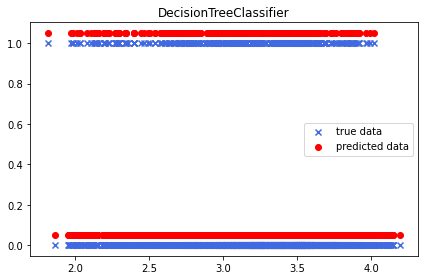

In [ ]:
x = df_exogs['DAYS_EMPLOYED_LOG10']
plt.scatter(x, y, marker='x', color='royalblue', label='true data')
plt.scatter(x, y_pred_dtree+.05, marker='o', color='r', label='predicted data')
plt.title('DecisionTreeClassifier')
plt.legend()
plt.tight_layout()

# Evaluate the classification results

## How **precise** were your shots?

<img src="https://images.squarespace-cdn.com/content/v1/5ac114ac96d455c1a62e09e7/1550637780435-FZLDGOPKWGG63PY15893/Precision+from+Brandmaier+2018.jpg?format=2500w" />
<img src="http://dieter.wang/files/images/fig_precision.png" />

## How many of the correct answers do you **recall**?


<img src="https://cdn-www.momtastic.com/assets/uploads/2011/09/file_104021_0_100715-memory-game6.jpg" />
<img src="http://dieter.wang/files/images/fig_recall.png" />

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

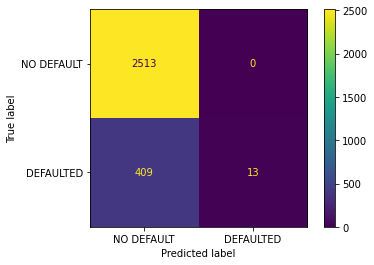

In [ ]:
cm = confusion_matrix(y, y_pred_logit)
disp = ConfusionMatrixDisplay(cm, display_labels=['NO DEFAULT', 'DEFAULTED'])
disp.plot()

In [ ]:
print(classification_report(y, y_pred_logit))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2513
         1.0       1.00      0.03      0.06       422

    accuracy                           0.86      2935
   macro avg       0.93      0.52      0.49      2935
weighted avg       0.88      0.86      0.80      2935



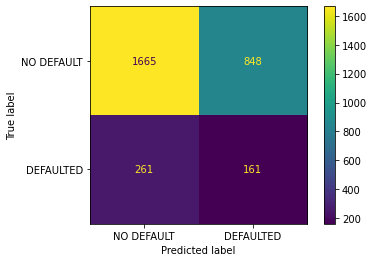

In [ ]:
cm = confusion_matrix(y, y_pred_percep)
disp = ConfusionMatrixDisplay(cm, display_labels=['NO DEFAULT', 'DEFAULTED'])
disp.plot()

In [ ]:
print(classification_report(y, y_pred_percep))

              precision    recall  f1-score   support

         0.0       0.86      0.66      0.75      2513
         1.0       0.16      0.38      0.23       422

    accuracy                           0.62      2935
   macro avg       0.51      0.52      0.49      2935
weighted avg       0.76      0.62      0.67      2935



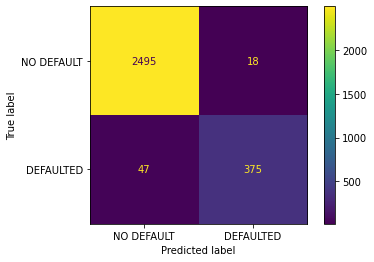

In [ ]:
cm = confusion_matrix(y, y_pred_dtree)
disp = ConfusionMatrixDisplay(cm, display_labels=['NO DEFAULT', 'DEFAULTED'])
disp.plot()

In [ ]:
print(classification_report(y, y_pred_dtree))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2513
         1.0       0.95      0.89      0.92       422

    accuracy                           0.98      2935
   macro avg       0.97      0.94      0.95      2935
weighted avg       0.98      0.98      0.98      2935

